## $$\text{Regresión logística}$$

Regresión lineal:
$$ y = b_0 + b_1 * x $$
Función sigmoide:
$$ p = \frac{1}{1 + e^{-y}}$$
Regresión logística (aplicando la función sigmoide a y):
$$ \ln{(\frac{p}{1-p})} = b_0 + b_1 * x $$

<div style="display: flex; gap:10px">
    <img style="width: 45%" src="../img/logistic_reg.jpeg">
    <img style="width: 45%" src="../img/logistic_predreg.jpeg">
</div>

### Importamos el data set

In [39]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv('../data/Social_Network_Ads.csv')
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

### Dividimos en datos de entranamiento y testeo

In [51]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

### Escalamos

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

### Ajustamos el modelo

In [55]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Predecimos

In [56]:
y_pred = classifier.predict(x_test)

### Matriz de confusión

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 68],
       [ 0, 32]])

### El escalado y el uso de memoria
`Nota Importante!`

In [68]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
print(X1.shape)
print(X1.nbytes)
print(X2.shape)
print(X2.nbytes)

(60, 62)
29760
(60, 62)
29760


In [66]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
print(X1.shape)
print(X1.nbytes)
print(X2.shape)
print(X2.nbytes)

(1350020, 440)
4752070400
(1350020, 440)
4752070400


### Representación gráfica

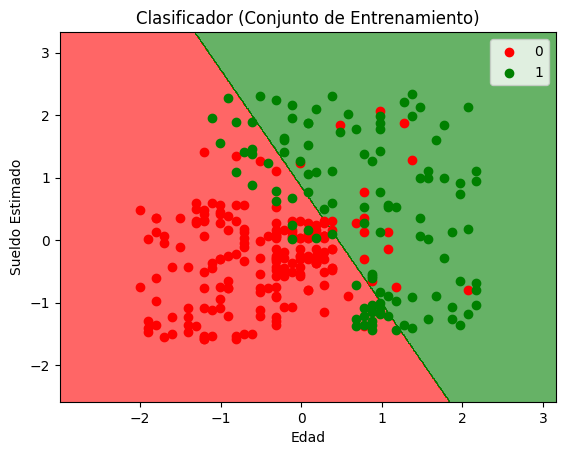

In [67]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green'))(i)).reshape(1,-1), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

### Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

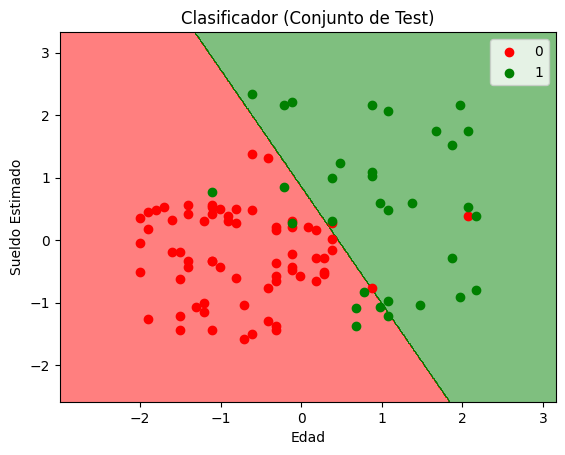

In [49]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = [[ListedColormap(('red', 'green'))(i)]], label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()